# Load librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [2]:
adcc = pd.read_csv(r'H:\Desktop\00- Projects\Adcc Clustering\Data\adcc_historical_data.csv', sep=';')

# Data exploration

In [3]:
print(adcc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB
None


In [24]:
print(adcc.describe())

           match_id     winner_id      loser_id  winner_points  loser_points  \
count   1028.000000   1028.000000   1028.000000    1028.000000   1028.000000   
mean    9190.565175   2487.659533   2944.011673       0.807393     -0.590467   
std    11085.517307   3489.950628   3572.119124       3.123530      0.674033   
min      140.000000     -1.000000     -1.000000      -1.000000     -1.000000   
25%     1173.500000    195.000000     -1.000000      -1.000000     -1.000000   
50%     3304.500000    644.000000    939.000000      -1.000000     -1.000000   
75%    13904.250000   3009.000000   5463.000000       2.000000      0.000000   
max    35103.000000  12922.000000  13095.000000      22.000000      6.000000   

              year  
count  1028.000000  
mean   2010.874514  
std       7.369033  
min    1998.000000  
25%    2005.000000  
50%    2011.000000  
75%    2017.000000  
max    2022.000000  


In [12]:
adcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB


In [15]:
adcc.head()

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,NaN,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,NaN,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,PEN,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,NaN,ABS,M,4F,2022


In [ ]:
adcc.isnull().sum()

match_id           0
winner_id          0
winner_name        0
loser_id           0
loser_name         0
win_type           0
submission       628
winner_points      0
loser_points       0
adv_pen          999
weight_class       0
sex                0
stage              0
year               0
dtype: int64

We can see that there is a problem with adv_pen because it is only filled when there is a draw on points we will ignore this column

In [17]:
adcc=adcc.drop('adv_pen', axis=1)

In [20]:
adcc.isnull().sum()

match_id           0
winner_id          0
winner_name        0
loser_id           0
loser_name         0
win_type           0
submission       628
winner_points      0
loser_points       0
weight_class       0
sex                0
stage              0
year               0
dtype: int64

We can visualize what are the type of submissions that are most used to win in this dataset

In [26]:
# Erase the NA
adcc_submission = adcc[adcc['submission'] != "N/A"]

# Count each submission
submission_counts = adcc['submission'].value_counts()

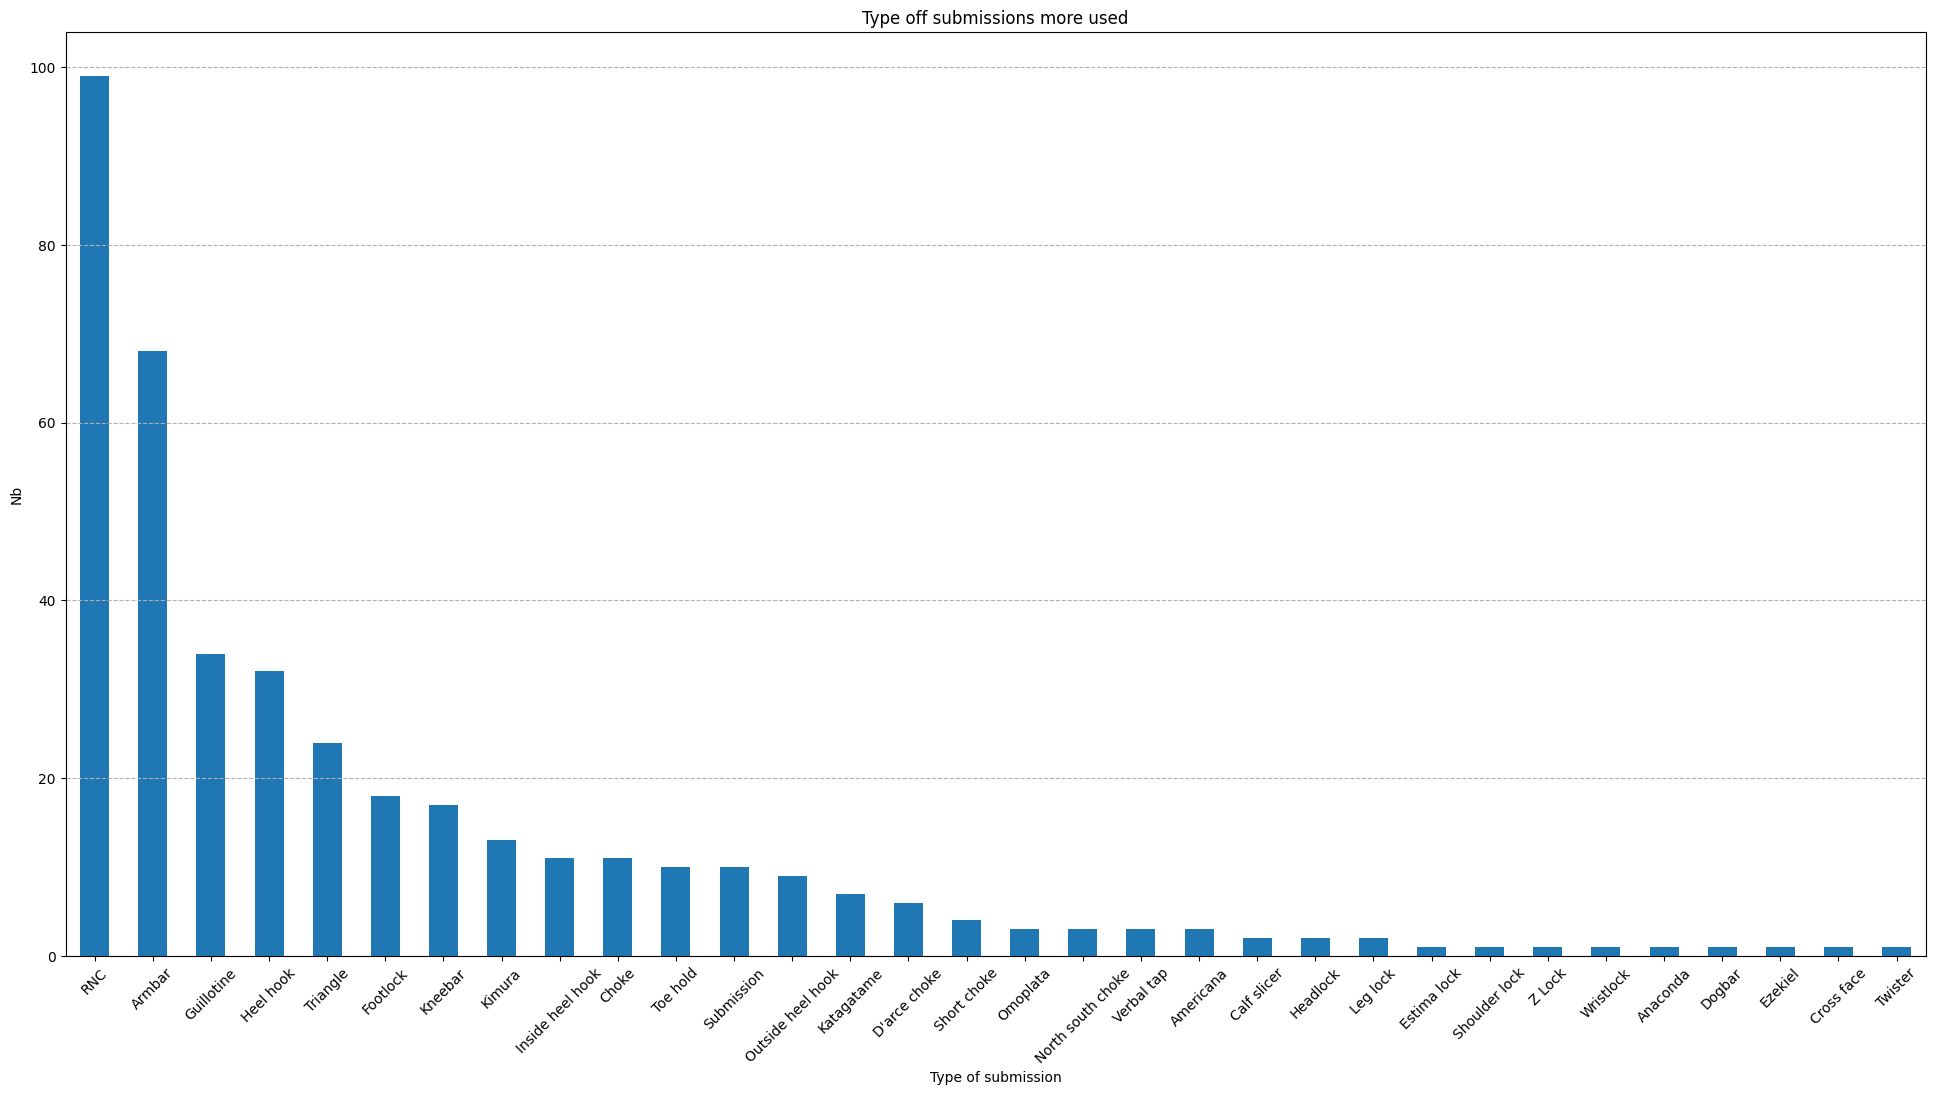

In [40]:
plt.figure(figsize=(24,12))
submission_counts.plot(kind='bar')
plt.title("Type off submissions more used")
plt.xlabel("Type of submission")
plt.ylabel("Nb")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

We can see that the most used submission is Rare Naked Choke this indicates us that it is very important to learn how to get to the back of your opponent 

We can visualize the amount off wins via submission points or decision

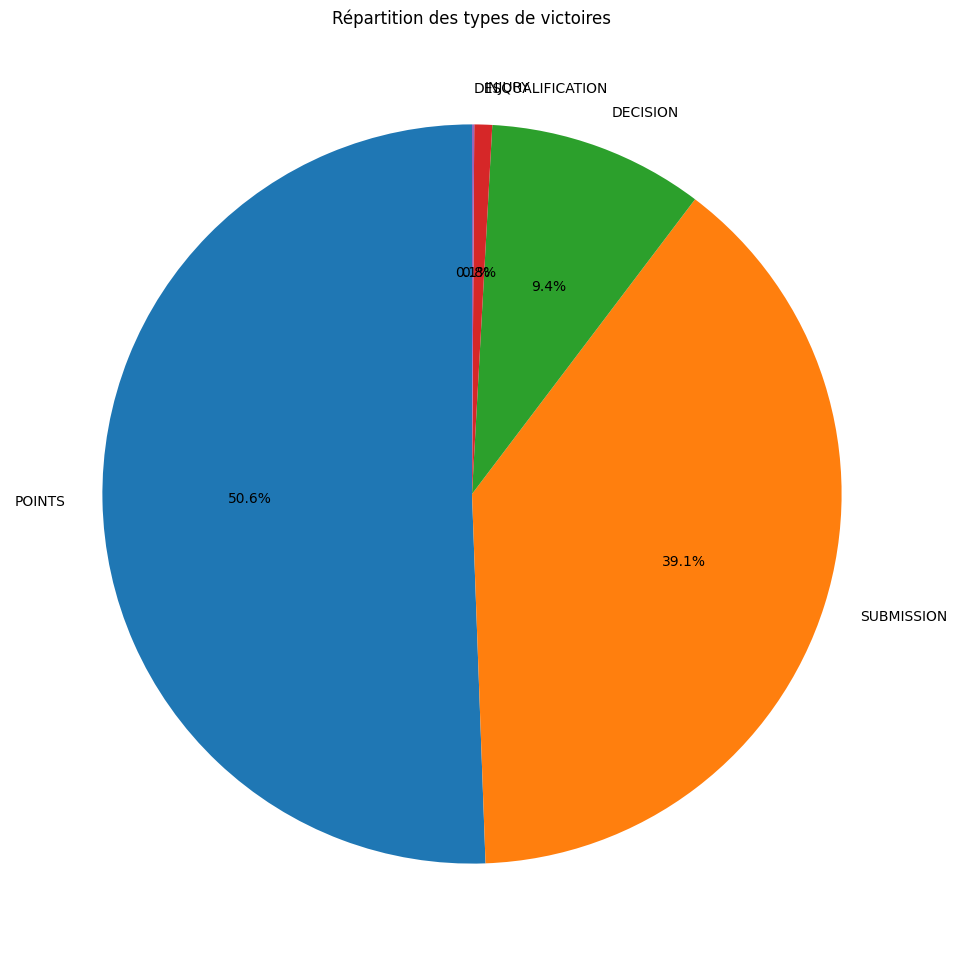

In [48]:
win_type_counts = adcc['win_type'].value_counts()
plt.figure(figsize=(12, 12))
win_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0, 0, 0,0,0])
plt.title("Répartition des types de victoires")
plt.ylabel("")
plt.show()

In [43]:
print(win_type_counts)


win_type
POINTS              520
SUBMISSION          402
DECISION             97
INJURY                8
DESQUALIFICATION      1
Name: count, dtype: int64
